<a href="https://colab.research.google.com/github/ansiyo/Machine-Learning-Rep/blob/main/Tensorflow_Healthdata_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated dietary data (replace with real dataset)
np.random.seed(42)
timesteps = 30  # 30 days of food intake
features = 5    # Number of dietary variables
samples = 1000  # Number of individuals

# Generate synthetic dietary intake data (normalized)
X = np.random.rand(samples, timesteps, features)

# Generate binary diabetes labels (1: Diabetes, 0: No Diabetes)
y = np.random.randint(0, 2, samples)

# Normalize labels
scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(timesteps, features)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5051 - loss: 0.6969 - val_accuracy: 0.4700 - val_loss: 0.6932
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4847 - loss: 0.6935 - val_accuracy: 0.5400 - val_loss: 0.6911
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5211 - loss: 0.6938 - val_accuracy: 0.5400 - val_loss: 0.6904
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5502 - loss: 0.6907 - val_accuracy: 0.5400 - val_loss: 0.6910
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4759 - loss: 0.6947 - val_accuracy: 0.5400 - val_loss: 0.6904
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5441 - loss: 0.6907 - val_accuracy: 0.5400 - val_loss: 0.6902
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5292 - loss: 0.6889 - val_accuracy: 0.4950 - val_loss: 0.6925
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4702 - loss: 0.6938 - val_accuracy: 0.5400 - v

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')

In [ ]:
df.head()

,p_ID,County,Sex,age,wealth_band,residence,edu_level_band,ethnicity,Marital_status,Main_Work,...,physicaly_inactive,stroke_angina_heart_attack,bmi,waist_hip_ratio,Hdl_5_cholesterol,pregnant,Fasting_blood_glucose,avg_heartbeat_pm,pre_hypertens_hypertension,prediab_diab
0,1001,KWALE,Female,40,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,1,31.269350,0.888302,3.68,0,5.1,81,0,0
1,1003,KWALE,Male,35,2,Rural,2,Miji Kenda,Never married,Unemployed able to work,...,0,0,16.776909,0.821513,4.49,0,4.6,71,1,0
2,1008,KWALE,Male,60,3,Rural,2,Miji Kenda,Divorced,Unemployed able to work,...,0,0,15.124224,0.844172,3.79,0,4.4,60,1,0
3,1011,KWALE,Male,19,2,Rural,3,Miji Kenda,Never married,work,...,0,0,19.447709,0.835774,2.59,0,4.9,53,0,0
4,1013,KWALE,Female,51,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,0,15.425202,0.862144,3.31,0,4.7,75,1,0


In [ ]:
plt.plot(df["county"], df["sex"],df["age"],df["wealth_band"],df["residential"])
plt.show() # Display the plot

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt # Make sure this is executed before calling plt.plot

plt.plot(df["county"], df["sex"],df["age"],df["wealth_band"],df["residential"])
plt.show() # Display the plot

KeyError: 'county'

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df["county"], label="county")
plt.plot(df.index, df["sex"], label="sex")
plt.plot(df.index, df["age"], label="age")
plt.plot(df.index, df["wealth_band"], label="wealth_band")
plt.plot(df.index, df["residential"], label="residential")
plt.legend()
plt.show()

KeyError: 'county'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   p_ID                        4500 non-null   int64  
 1   County                      4500 non-null   object 
 2   Sex                         4500 non-null   object 
 3   age                         4500 non-null   int64  
 4   wealth_band                 4500 non-null   int64  
 5   residence                   4500 non-null   object 
 6   edu_level_band              4500 non-null   int64  
 7   ethnicity                   4500 non-null   object 
 8   Marital_status              4500 non-null   object 
 9   Main_Work                   4500 non-null   object 
 10  Agri_land_ownership         4500 non-null   int64  
 11  livestock                   4500 non-null   int64  
 12  smoking                     4500 non-null   int64  
 13  alcohol                     4500 

In [ ]:
df.dropna()

,p_ID,County,Sex,age,wealth_band,residence,edu_level_band,ethnicity,Marital_status,Main_Work,...,physicaly_inactive,stroke_angina_heart_attack,bmi,waist_hip_ratio,Hdl_5_cholesterol,pregnant,Fasting_blood_glucose,avg_heartbeat_pm,pre_hypertens_hypertension,prediab_diab
0,1001,KWALE,Female,40,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,1,31.269350,0.888302,3.68,0,5.1,81,0,0
1,1003,KWALE,Male,35,2,Rural,2,Miji Kenda,Never married,Unemployed able to work,...,0,0,16.776909,0.821513,4.49,0,4.6,71,1,0
2,1008,KWALE,Male,60,3,Rural,2,Miji Kenda,Divorced,Unemployed able to work,...,0,0,15.124224,0.844172,3.79,0,4.4,60,1,0
3,1011,KWALE,Male,19,2,Rural,3,Miji Kenda,Never married,work,...,0,0,19.447709,0.835774,2.59,0,4.9,53,0,0
4,1013,KWALE,Female,51,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,0,15.425202,0.862144,3.31,0,4.7,75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,200102,BUSIA,Male,47,3,Urban,3,Luo,Currently married,Self-employed,...,0,0,18.000000,0.811111,3.69,0,5.0,62,1,0
4496,200106,BUSIA,Male,24,4,Urban,4,Luhya,Never married,0n-govt employee,...,0,1,21.898734,0.888889,3.51,0,3.7,53,0,0
4497,200115,BUSIA,Male,62,5,Urban,4,Luhya,Currently married,Self-employed,...,0,0,25.029070,1.060000,5.06,0,12.7,90,1,1
4498,200119,BUSIA,Female,28,5,Urban,4,Luo,Currently married,Self-employed,...,0,1,22.820513,0.837500,4.29,0,5.2,76,0,0


In [ ]:
import pandas as pf
import matplotlib.pyplot as plt

In [ ]:
print(df.columns)

Index(['p_ID', 'County', 'Sex', 'age', 'wealth_band', 'residence',
       'edu_level_band', 'ethnicity', 'Marital_status', 'Main_Work',
       'Agri_land_ownership', 'livestock', 'smoking', 'alcohol', 'chewed_khat',
       'fruits_servings_week', 'vegs_servings_week', 'consumption_salt',
       'limit_processed_food', 'low_salt_alternatives', 'spices_instead_salt',
       'avoid_outside_food', 'avoid_salt', 'cooking_oil_fat',
       'outside_meals_week', 'bottles_soda_week', 'sugar_amount',
       'unrefined_sugar', 'physicaly_inactive', 'stroke_angina_heart_attack',
       'bmi', 'waist_hip_ratio', 'Hdl_5_cholesterol', 'pregnant',
       'Fasting_blood_glucose', 'avg_heartbeat_pm',
       'pre_hypertens_hypertension', 'prediab_diab'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   p_ID                        4500 non-null   int64  
 1   County                      4500 non-null   object 
 2   Sex                         4500 non-null   object 
 3   age                         4500 non-null   int64  
 4   wealth_band                 4500 non-null   int64  
 5   residence                   4500 non-null   object 
 6   edu_level_band              4500 non-null   int64  
 7   ethnicity                   4500 non-null   object 
 8   Marital_status              4500 non-null   object 
 9   Main_Work                   4500 non-null   object 
 10  Agri_land_ownership         4500 non-null   int64  
 11  livestock                   4500 non-null   int64  
 12  smoking                     4500 non-null   int64  
 13  alcohol                     4500 

In [ ]:
df.dropna()

,p_ID,County,Sex,age,wealth_band,residence,edu_level_band,ethnicity,Marital_status,Main_Work,...,physicaly_inactive,stroke_angina_heart_attack,bmi,waist_hip_ratio,Hdl_5_cholesterol,pregnant,Fasting_blood_glucose,avg_heartbeat_pm,pre_hypertens_hypertension,prediab_diab
0,1001,KWALE,Female,40,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,1,31.269350,0.888302,3.68,0,5.1,81,0,0
1,1003,KWALE,Male,35,2,Rural,2,Miji Kenda,Never married,Unemployed able to work,...,0,0,16.776909,0.821513,4.49,0,4.6,71,1,0
2,1008,KWALE,Male,60,3,Rural,2,Miji Kenda,Divorced,Unemployed able to work,...,0,0,15.124224,0.844172,3.79,0,4.4,60,1,0
3,1011,KWALE,Male,19,2,Rural,3,Miji Kenda,Never married,work,...,0,0,19.447709,0.835774,2.59,0,4.9,53,0,0
4,1013,KWALE,Female,51,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,0,15.425202,0.862144,3.31,0,4.7,75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,200102,BUSIA,Male,47,3,Urban,3,Luo,Currently married,Self-employed,...,0,0,18.000000,0.811111,3.69,0,5.0,62,1,0
4496,200106,BUSIA,Male,24,4,Urban,4,Luhya,Never married,0n-govt employee,...,0,1,21.898734,0.888889,3.51,0,3.7,53,0,0
4497,200115,BUSIA,Male,62,5,Urban,4,Luhya,Currently married,Self-employed,...,0,0,25.029070,1.060000,5.06,0,12.7,90,1,1
4498,200119,BUSIA,Female,28,5,Urban,4,Luo,Currently married,Self-employed,...,0,1,22.820513,0.837500,4.29,0,5.2,76,0,0


In [ ]:
df.head(10)

,p_ID,County,Sex,age,wealth_band,residence,edu_level_band,ethnicity,Marital_status,Main_Work,...,physicaly_inactive,stroke_angina_heart_attack,bmi,waist_hip_ratio,Hdl_5_cholesterol,pregnant,Fasting_blood_glucose,avg_heartbeat_pm,pre_hypertens_hypertension,prediab_diab
0,1001,KWALE,Female,40,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,1,31.269350,0.888302,3.68,0,5.1,81,0,0
1,1003,KWALE,Male,35,2,Rural,2,Miji Kenda,Never married,Unemployed able to work,...,0,0,16.776909,0.821513,4.49,0,4.6,71,1,0
2,1008,KWALE,Male,60,3,Rural,2,Miji Kenda,Divorced,Unemployed able to work,...,0,0,15.124224,0.844172,3.79,0,4.4,60,1,0
3,1011,KWALE,Male,19,2,Rural,3,Miji Kenda,Never married,work,...,0,0,19.447709,0.835774,2.59,0,4.9,53,0,0
4,1013,KWALE,Female,51,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,0,15.425202,0.862144,3.31,0,4.7,75,1,0
5,1016,KWALE,Female,47,5,Rural,3,Miji Kenda,Currently married,Govt employee,...,1,1,26.925525,1.013060,4.14,0,5.0,84,0,0
6,1018,KWALE,Male,38,3,Rural,4,Miji Kenda,Currently married,Self-employed,...,0,0,25.217122,0.893123,3.72,0,5.1,74,1,0
7,1023,KWALE,Male,45,4,Rural,3,Miji Kenda,Currently married,0n-govt employee,...,1,0,18.875628,0.856492,3.72,0,5.0,61,1,0
8,1026,KWALE,Female,41,1,Rural,1,Miji Kenda,Currently married,homemaker,...,1,0,24.437299,0.965753,4.49,0,6.0,90,1,0
9,1028,KWALE,Male,48,2,Rural,3,Miji Kenda,Currently married,0n-govt employee,...,1,1,17.266187,0.953883,4.26,0,5.6,69,0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


TypeError: can't multiply sequence by non-int of type 'float'

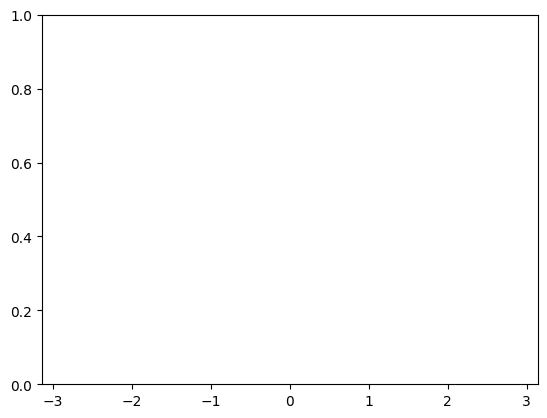

In [ ]:
# Define kwargs or remove it if no extra arguments are intended
# Here, we assume you have no extra arguments
pd.plotting.andrews_curves(df, class_column='avg_heartbeat_pm', columns=['','waist_hip_ratio'], samples=200)
plt.show() # To display the plot

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   p_ID                        4500 non-null   int64  
 1   County                      4500 non-null   object 
 2   Sex                         4500 non-null   object 
 3   age                         4500 non-null   int64  
 4   wealth_band                 4500 non-null   int64  
 5   residence                   4500 non-null   object 
 6   edu_level_band              4500 non-null   int64  
 7   ethnicity                   4500 non-null   object 
 8   Marital_status              4500 non-null   object 
 9   Main_Work                   4500 non-null   object 
 10  Agri_land_ownership         4500 non-null   int64  
 11  livestock                   4500 non-null   int64  
 12  smoking                     4500 non-null   int64  
 13  alcohol                     4500 

In [ ]:
import os

# Check if the file exists
file_path = '/content/2015STEPS_Data3xx_x5.csv'
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"File not found at: {file_path}")
    print("Please check the file path and make sure the file exists.")
    # If file is in a different directory, provide the correct path:
    # file_path = '/path/to/your/file/2015STEPS_Data3xx_x5.csv'

# Now you can read the CSV file using the correct path
df = pd.read_csv(file_path)

File not found at: /content/2015STEPS_Data3xx_x5.csv
Please check the file path and make sure the file exists.


FileNotFoundError: [Errno 2] No such file or directory: '/content/2015STEPS_Data3xx_x5.csv'

In [ ]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')  # Replace 'your_data.csv' with the actual file path

# Now you can use df
df.dropna()

FileNotFoundError: [Errno 2] No such file or directory: '/content/2015STEPS_Data3xx_x5.csv'

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:286: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


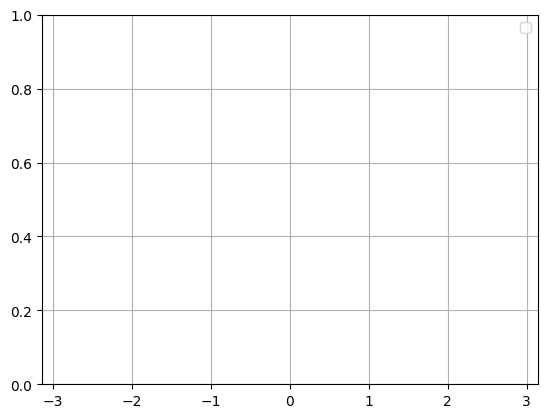

In [ ]:
# Example:
for col in ['consumption_salt','avoid_salt']:  # Removed extra spaces from column names
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce' replaces invalid values with NaN

# Drop rows with NaN values after conversion, if needed
df.dropna(subset=['consumption_salt', 'avoid_salt'], inplace=True)  # Removed extra spaces from column names

# Now, try the Andrews curves plot again
pd.plotting.andrews_curves(df, class_column='avg_heartbeat_pm', columns=['avoid_salt', 'consumption_salt'], samples=200)  # Removed extra spaces from column names
plt.show()

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:286: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


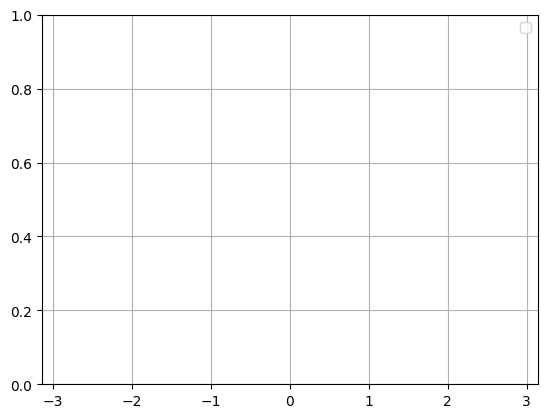

In [ ]:
# Example:
for col in ['consumption_salt','avoid_salt']:  # Removed extra spaces from column names
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce' replaces invalid values with NaN

# Drop rows with NaN values after conversion, if needed
df.dropna(subset=['consumption_salt', 'avoid_salt'], inplace=True)  # Removed extra spaces from column names

# Now, try the Andrews curves plot again
pd.plotting.andrews_curves(df, class_column='avg_heartbeat_pm', columns=['avoid_salt', 'consumption_salt'], samples=200)  # Removed extra spaces from column names
plt.show()

<Axes: title={'center': 'Line Plots of Marks in Different Subjects'}, xlabel='p_ID'>

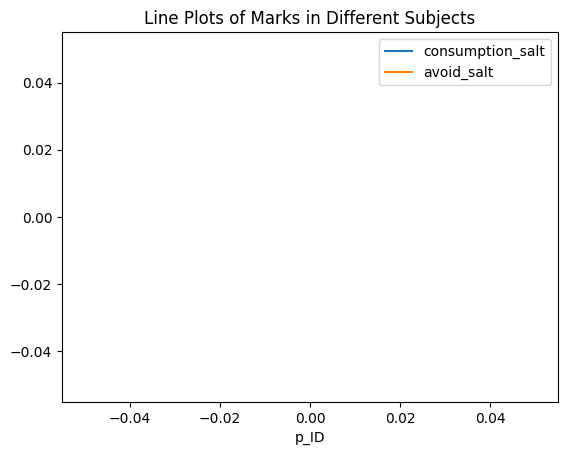

In [ ]:
# Plot multiple line plots using only pandas
df.plot(x='p_ID', y=['consumption_salt', 'avoid_salt'],
        kind='line',
        title='Line Plots of Marks in Different Subjects')

AttributeError: 'PlotAccessor' object has no attribute 'show'

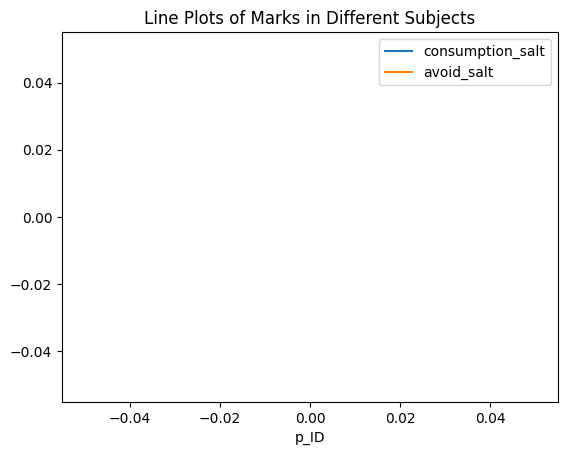

In [ ]:
# Plot multiple line plots using only pandas
df.plot(x='p_ID', y=['consumption_salt', 'avoid_salt'],
        kind='line',
        title='Line Plots of Marks in Different Subjects')


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:286: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


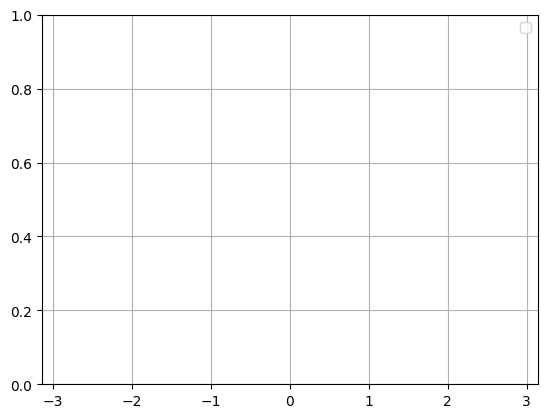

In [ ]:
# Example:
for col in ['consumption_salt','avoid_salt']:  # Removed extra spaces from column names
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce' replaces invalid values with NaN

# Drop rows with NaN values after conversion, if needed
df.dropna(subset=['consumption_salt', 'avoid_salt'], inplace=True)  # Removed extra spaces from column names

# Now, try the Andrews curves plot again
pd.plotting.andrews_curves(df, class_column='avg_heartbeat_pm', columns=['avoid_salt', 'consumption_salt'], samples=200)  # Removed extra spaces from column names
plt.show()

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')

In [ ]:
df.head(50)

,p_ID,County,Sex,age,wealth_band,residence,edu_level_band,ethnicity,Marital_status,Main_Work,...,physicaly_inactive,stroke_angina_heart_attack,bmi,waist_hip_ratio,Hdl_5_cholesterol,pregnant,Fasting_blood_glucose,avg_heartbeat_pm,pre_hypertens_hypertension,prediab_diab


In [ ]:
df.dropna

<bound method DataFrame.dropna of Empty DataFrame
Columns: [p_ID, County, Sex, age, wealth_band, residence, edu_level_band, ethnicity, Marital_status, Main_Work, Agri_land_ownership, livestock, smoking, alcohol, chewed_khat, fruits_servings_week, vegs_servings_week, consumption_salt, limit_processed_food, low_salt_alternatives, spices_instead_salt, avoid_outside_food, avoid_salt, cooking_oil_fat, outside_meals_week, bottles_soda_week, sugar_amount, unrefined_sugar, physicaly_inactive, stroke_angina_heart_attack, bmi, waist_hip_ratio, Hdl_5_cholesterol, pregnant, Fasting_blood_glucose, avg_heartbeat_pm, pre_hypertens_hypertension, prediab_diab]
Index: []

[0 rows x 38 columns]>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')  # Replace 'your_file.csv' with your actual file path
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')  # Replace 'your_file.csv' with your actual file path

# Now you can use df for plotting:
df.plot(x='avoid_salt', y=['consumption_salt'],
        kind='line',
        title='Line Plots of Marks in Different Subjects')
plt.show() # Call plt.show() to display the plot
plt.show() # Call plt.show() to display the plot

TypeError: no numeric data to plot

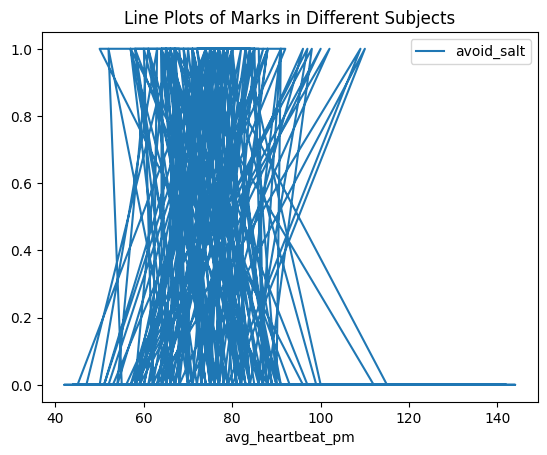

NameError: name 'x' is not defined

In [ ]:
# Plot multiple line plots using only pandas
df.plot(x='avg_heartbeat_pm', y=['consumption_salt', 'avoid_salt'],
        kind='line',
        title='Line Plots of Marks in Different Subjects')

plt.show() # Call plt.show() to display the plot
df = pd.DataFrame({'avg_heartbeat_pm': x, 'consumption_salt': y, 'avoid_salt': y})
df.plot()
plt.show()

In [ ]:
plt.show() # Call plt.show() to display the plot
df = pd.DataFrame({'avg_heartbeat_pm': x, 'consumption_salt': y, 'avoid_salt': y})
plt.title('Line Plots of Marks in Different Subjects')
plt.show()

NameError: name 'x' is not defined

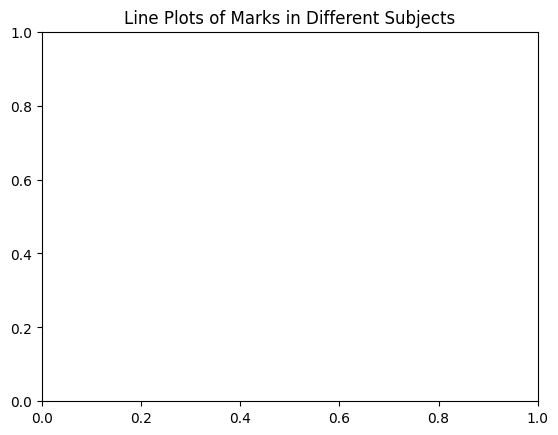

In [ ]:
x = df['avg_heartbeat_pm'].values
y = df['consumption_salt'].values  # or use 'avoid_salt' if they should have the same values

df_new = pd.DataFrame({'avg_heartbeat_pm': x, 'consumption_salt': y, 'avoid_salt': y})

plt.title('Line Plots of Marks in Different Subjects')
plt.show()

In [ ]:
df =pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')

In [ ]:
df.head()

,p_ID,County,Sex,age,wealth_band,residence,edu_level_band,ethnicity,Marital_status,Main_Work,...,physicaly_inactive,stroke_angina_heart_attack,bmi,waist_hip_ratio,Hdl_5_cholesterol,pregnant,Fasting_blood_glucose,avg_heartbeat_pm,pre_hypertens_hypertension,prediab_diab
0,1001,KWALE,Female,40,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,1,31.269350,0.888302,3.68,0,5.1,81,0,0
1,1003,KWALE,Male,35,2,Rural,2,Miji Kenda,Never married,Unemployed able to work,...,0,0,16.776909,0.821513,4.49,0,4.6,71,1,0
2,1008,KWALE,Male,60,3,Rural,2,Miji Kenda,Divorced,Unemployed able to work,...,0,0,15.124224,0.844172,3.79,0,4.4,60,1,0
3,1011,KWALE,Male,19,2,Rural,3,Miji Kenda,Never married,work,...,0,0,19.447709,0.835774,2.59,0,4.9,53,0,0
4,1013,KWALE,Female,51,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,0,15.425202,0.862144,3.31,0,4.7,75,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   p_ID                        4500 non-null   int64  
 1   County                      4500 non-null   object 
 2   Sex                         4500 non-null   object 
 3   age                         4500 non-null   int64  
 4   wealth_band                 4500 non-null   int64  
 5   residence                   4500 non-null   object 
 6   edu_level_band              4500 non-null   int64  
 7   ethnicity                   4500 non-null   object 
 8   Marital_status              4500 non-null   object 
 9   Main_Work                   4500 non-null   object 
 10  Agri_land_ownership         4500 non-null   int64  
 11  livestock                   4500 non-null   int64  
 12  smoking                     4500 non-null   int64  
 13  alcohol                     4500 

In [ ]:
df.dropna()

,p_ID,County,Sex,age,wealth_band,residence,edu_level_band,ethnicity,Marital_status,Main_Work,...,physicaly_inactive,stroke_angina_heart_attack,bmi,waist_hip_ratio,Hdl_5_cholesterol,pregnant,Fasting_blood_glucose,avg_heartbeat_pm,pre_hypertens_hypertension,prediab_diab
0,1001,KWALE,Female,40,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,1,31.269350,0.888302,3.68,0,5.1,81,0,0
1,1003,KWALE,Male,35,2,Rural,2,Miji Kenda,Never married,Unemployed able to work,...,0,0,16.776909,0.821513,4.49,0,4.6,71,1,0
2,1008,KWALE,Male,60,3,Rural,2,Miji Kenda,Divorced,Unemployed able to work,...,0,0,15.124224,0.844172,3.79,0,4.4,60,1,0
3,1011,KWALE,Male,19,2,Rural,3,Miji Kenda,Never married,work,...,0,0,19.447709,0.835774,2.59,0,4.9,53,0,0
4,1013,KWALE,Female,51,4,Rural,3,Miji Kenda,Currently married,homemaker,...,1,0,15.425202,0.862144,3.31,0,4.7,75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,200102,BUSIA,Male,47,3,Urban,3,Luo,Currently married,Self-employed,...,0,0,18.000000,0.811111,3.69,0,5.0,62,1,0
4496,200106,BUSIA,Male,24,4,Urban,4,Luhya,Never married,0n-govt employee,...,0,1,21.898734,0.888889,3.51,0,3.7,53,0,0
4497,200115,BUSIA,Male,62,5,Urban,4,Luhya,Currently married,Self-employed,...,0,0,25.029070,1.060000,5.06,0,12.7,90,1,1
4498,200119,BUSIA,Female,28,5,Urban,4,Luo,Currently married,Self-employed,...,0,1,22.820513,0.837500,4.29,0,5.2,76,0,0


In [ ]:
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')

pd.plotting.andrews_curves(df, 'Name')

KeyError: 'Name'

In [ ]:
# Example:
for col in ['consumption_salt','avoid_salt']:  # Removed extra spaces from column names
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce' replaces invalid values with NaN

# Drop rows with NaN values after conversion, if needed
df.dropna(subset=['consumption_salt', 'avoid_salt'], inplace=True)  # Removed extra spaces from column names

# Now, try the Andrews curves plot again
pd.plotting.andrews_curves(df, class_column='avg_heartbeat_pm', columns=['avoid_salt', 'consumption_salt'], samples=200)  # Removed extra spaces from column names
plt.show()

NameError: name 'pd' is not defined

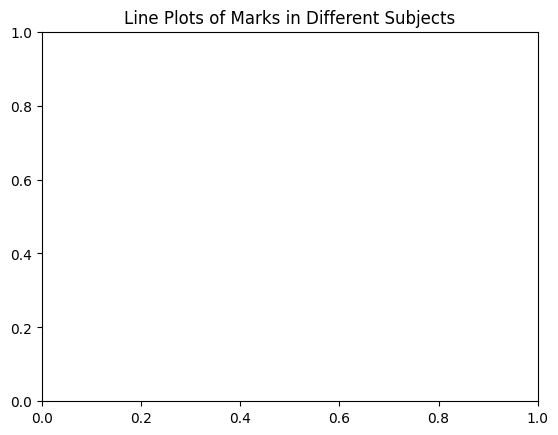

In [ ]:
x = df['avg_heartbeat_pm'].values
y = df['consumption_salt'].values  # or use 'avoid_salt' if they should have the same values

df_new = pd.DataFrame({'avg_heartbeat_pm': x, 'consumption_salt': y, 'avoid_salt': y})

plt.title('Line Plots of Marks in Different Subjects')
plt.show()

Index(['p_ID', 'County', 'Sex', 'age', 'wealth_band', 'residence',
       'edu_level_band', 'ethnicity', 'Marital_status', 'Main_Work',
       'Agri_land_ownership', 'livestock', 'smoking', 'alcohol', 'chewed_khat',
       'fruits_servings_week', 'vegs_servings_week', 'consumption_salt',
       'limit_processed_food', 'low_salt_alternatives', 'spices_instead_salt',
       'avoid_outside_food', 'avoid_salt', 'cooking_oil_fat',
       'outside_meals_week', 'bottles_soda_week', 'sugar_amount',
       'unrefined_sugar', 'physicaly_inactive', 'stroke_angina_heart_attack',
       'bmi', 'waist_hip_ratio', 'Hdl_5_cholesterol', 'pregnant',
       'Fasting_blood_glucose', 'avg_heartbeat_pm',
       'pre_hypertens_hypertension', 'prediab_diab'],
      dtype='object')


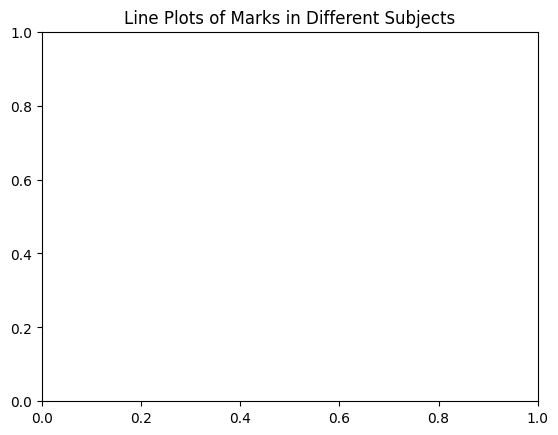

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the DataFrame
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')

# Check if the column exists (print column names)
print(df.columns)

# If column 'avg_heartbeat_pm' is not present, handle accordingly.
# For example, if it's named differently:
if 'low_salt_alternatives' not in df.columns:
    # Assume the column is named 'avg_heartbeat'
    # Change this to the correct column name if it's different
    x = df['low_salt_alternatives'].values
else:
    x = df['low_salt_alternatives'].values

# Proceed with the rest of your code
y = df['consumption_salt'].values
x = df['low_salt_alternatives'].values
x = df['low_salt_alternatives'].values

df_new = pd.DataFrame({'low_salt_alternatives': x, 'consumption_salt': y, ['avoid_salt'].values': y})

plt.title('Line Plots of Marks in Different Subjects')
plt.show()

Index(['p_ID', 'County', 'Sex', 'age', 'wealth_band', 'residence',
       'edu_level_band', 'ethnicity', 'Marital_status', 'Main_Work',
       'Agri_land_ownership', 'livestock', 'smoking', 'alcohol', 'chewed_khat',
       'fruits_servings_week', 'vegs_servings_week', 'consumption_salt',
       'limit_processed_food', 'low_salt_alternatives', 'spices_instead_salt',
       'avoid_outside_food', 'avoid_salt', 'cooking_oil_fat',
       'outside_meals_week', 'bottles_soda_week', 'sugar_amount',
       'unrefined_sugar', 'physicaly_inactive', 'stroke_angina_heart_attack',
       'bmi', 'waist_hip_ratio', 'Hdl_5_cholesterol', 'pregnant',
       'Fasting_blood_glucose', 'avg_heartbeat_pm',
       'pre_hypertens_hypertension', 'prediab_diab'],
      dtype='object')


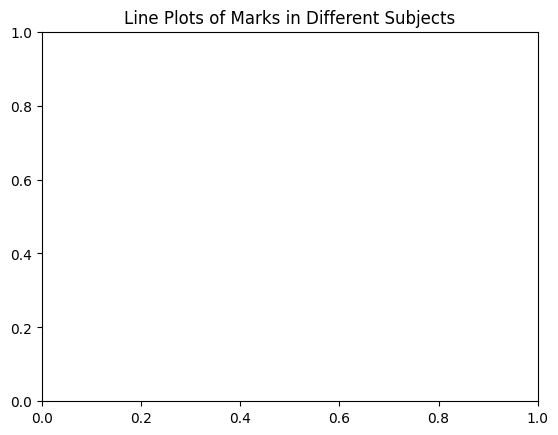

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the DataFrame
df = pd.read_csv('/content/2015STEPS_Data3xx_x5.csv')

# Check if the column exists (print column names)
print(df.columns)

# If column 'avg_heartbeat_pm' is not present, handle accordingly.
# For example, if it's named differently:
if 'avg_heartbeat_pm' not in df.columns:
    # Assume the column is named 'avg_heartbeat'
    # Change this to the correct column name if it's different
    x = df['avg_heartbeat'].values
else:
    x = df['avg_heartbeat_pm'].values

# Proceed with the rest of your code
y = df['consumption_salt'].values

df_new = pd.DataFrame({'avg_heartbeat_pm': x, 'consumption_salt': y, 'avoid_salt': y})

plt.title('Line Plots of Marks in Different Subjects')
plt.show()

In [ ]:
# Assuming 'avg_heartbeat_pm', 'consumption_salt', and 'avoid_salt'
# are columns in your original DataFrame (df),
# you can extract their values like this:
x = df['avg_heartbeat_pm'].values
y = df['consumption_salt'].values  # or use 'avoid_salt' if they should have the same values

df_new = pd.DataFrame({'avg_heartbeat_pm': x, 'consumption_salt': y, 'avoid_salt': y})

plt.title('Line Plots of Marks in Different Subjects')
plt.show()

KeyError: 'avg_heartbeat_pm'